#모수 확률밀도 추정(Parametric Density Estimation) : 클래스별 


*   확률 모델 가정 후 값(파라미터) 추정 : 평균이나 분산 등
*   단점 : 추정한 밀도함수와 모집단 밀도 함수 차이 시 의미 없음



## 데이터가 가우시안 분포로 가정
$
p(x|C_k) = G(x;μ_k, Σ_k) \\
= \frac{1}{\sqrt{2π_n}\sqrt{|Σ_k|}}\exp[-\frac{1}{2}(x-μ_k)^TΣ_k^-1(x-μ_k)]
$

In [ ]:
import numpy as np
np.random.seed(0)

row_count = 200

### 단변량 분포

In [ ]:
x = np.linspace(-8, 8, row_count)

mu_1, sigma_1 = 0.0, 1.0
mu_2, sigma_2 = 1.5, 1.5
mu_3, sigma_3 = 3.0, 2.0

y_1 = (1 / np.sqrt(2 * np.pi * sigma_1**2)) * np.exp(-(x-mu_1)**2 / (2 * sigma_1**2))
y_2 = (1 / np.sqrt(2 * np.pi * sigma_2**2)) * np.exp(-(x-mu_2)**2 / (2 * sigma_2**2))
y_3 = (1 / np.sqrt(2 * np.pi * sigma_3**2)) * np.exp(-(x-mu_3)**2 / (2 * sigma_3**2))
print(y_1.var(),  y_2.var(), y_3.var()) # 분산
print(y_1.std(),  y_2.std(), y_3.std()) # 표준편차
type(x), x.shape, y_1.shape, x.mean(),#x, y_1 

0.013675484707188056 0.007827944897583367 0.004947717420012018
0.11694222807518273 0.0884756740442443 0.0703400129372466


(numpy.ndarray, (200,), (200,), 2.842170943040401e-16)

In [ ]:
import matplotlib.pyplot as plt

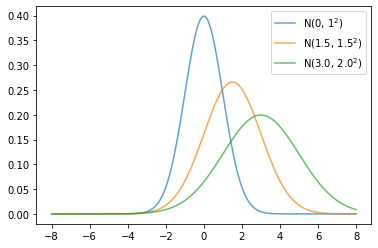

In [ ]:
plt.plot(x, y_1, alpha=0.7, label=r'N(0, $1^2$)')
plt.plot(x, y_2, alpha=0.7, label=r'N(1.5, $1.5^2$)')
plt.plot(x, y_3, alpha=0.7, label='N(3.0, $2.0^2$)')
plt.legend(ncol=1)

In [ ]:
rand_x_1 = np.sort(np.random.randn(row_count))
rand_x_1.shape, rand_x_1.mean(), rand_x_1.std()# rand_x_1

((200,), 0.0709104931411612, 1.0214227686959954)

In [ ]:
rand_y_1 = (1 / np.sqrt(2 * np.pi * sigma_1**2)) * np.exp(-(rand_x_1-mu_1)**2 / (2 * sigma_1**2))

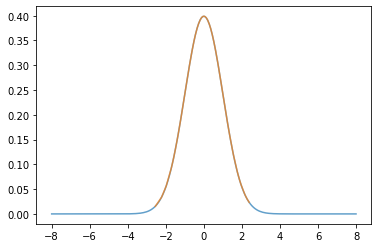

In [ ]:
# x_y = np.full_like(x, fill_value=-0.01)
# plt.plot(x, x_y, 'o', color='blue', ms=1, ls='None', label=r'P N(0, $1^2$)')

plt.plot(x, y_1, alpha=0.7, label=r'N(0, $1^2$)')
plt.plot(rand_x_1, rand_y_1, alpha=0.7, label=r'Random N(0, $1^2$)')

###다변량 분포